En el conjunto de datos se recoge la produccion de leche mensual de una granja

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/proyecto-tensorflow/monthly-milk-production.csv'

Mounted at /content/drive


In [ ]:

df = pd.read_csv(path)
df

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0
...,...,...
163,1975-08-01 01:00:00,858.0
164,1975-09-01 01:00:00,817.0
165,1975-10-01 01:00:00,827.0
166,1975-11-01 01:00:00,797.0


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Milk Production'].values.reshape(-1, 1))

In [ ]:
sequence_length = 12
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X = np.array(X)
y = np.array(y)

In [ ]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
4/4 [==============================] - 2s 179ms/step - loss: 0.2093 - val_loss: 0.4661
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1760 - val_loss: 0.3909
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1450 - val_loss: 0.3162
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1152 - val_loss: 0.2389
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0849 - val_loss: 0.1622
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0576 - val_loss: 0.0897
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0322 - val_loss: 0.0365
Epoch 8/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0250 - val_loss: 0.0280
Epoch 9/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0295 - val_loss: 0.0329
Epoch 10/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0277 - val_loss: 0.0253
Epoch 11/50
4/4 [===========

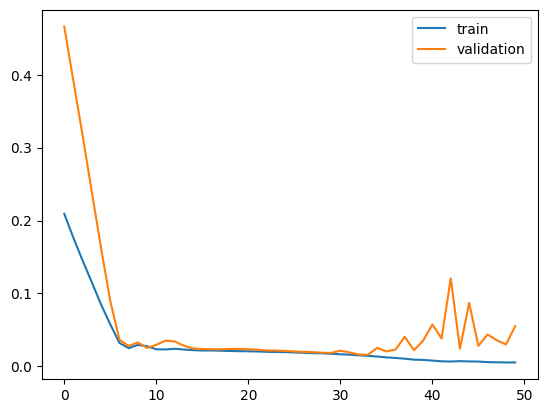

In [ ]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 26ms/step - loss: 0.0577
Test loss: 0.05767447501420975


In [ ]:
#predicciones proximo año
future_months = 12
future_predictions = []
last_sequence = X[-1]
for i in range(future_months):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(prediction[0][0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = prediction[0][0]

1/1 [==============================] - 0s 59ms/step


In [ ]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [ ]:
last_date = pd.to_datetime(df['Month'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='M')
future_df = pd.DataFrame({'Date': future_dates, 'MilkProduction': future_predictions.flatten()})
print(future_df)

                  Date  MilkProduction
0  1976-01-31 01:00:00      833.282349
1  1976-02-29 01:00:00      871.392761
2  1976-03-31 01:00:00      943.173767
3  1976-04-30 01:00:00     1104.408203
4  1976-05-31 01:00:00     1225.921875
5  1976-06-30 01:00:00     1293.209106
6  1976-07-31 01:00:00     1208.573975
7  1976-08-31 01:00:00     1088.719849
8  1976-09-30 01:00:00      987.692017
9  1976-10-31 01:00:00      922.151367
10 1976-11-30 01:00:00      902.225525
11 1976-12-31 01:00:00      968.316589
